In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [6]:
# Load training data from CSV
train_data = pd.read_csv("fashion-mnist_train.csv")
train_images = train_data.drop(columns=['label']).values.reshape(-1, 28, 28, 1)
train_labels = to_categorical(train_data['label'])

In [7]:
# Load testing data from CSV
test_data = pd.read_csv("fashion-mnist_test.csv")
test_images = test_data.drop(columns=['label']).values.reshape(-1, 28, 28, 1)
test_labels = to_categorical(test_data['label'])

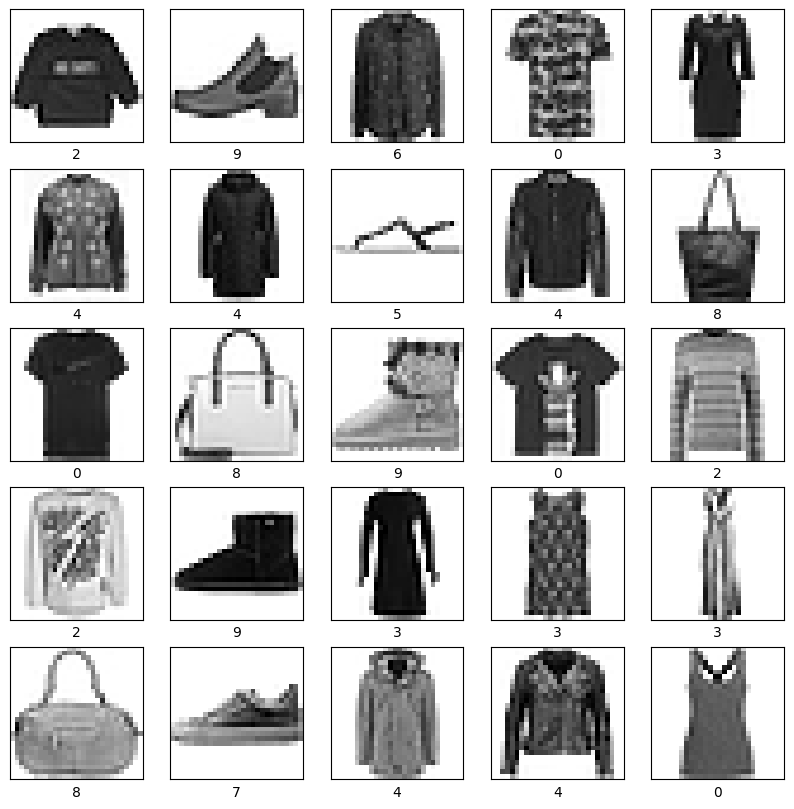

In [8]:
# Visualize a few examples from the training dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(np.argmax(train_labels[i]))
plt.show()

In [9]:
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


In [10]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
# Train the model
batch_size = 128
epochs = 10
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 20s 50ms/step - loss: 0.8897 - accuracy: 0.6863 - val_loss: 0.5142 - val_accuracy: 0.8100
Epoch 2/10
375/375 [==============================] - 23s 60ms/step - loss: 0.5545 - accuracy: 0.8000 - val_loss: 0.4261 - val_accuracy: 0.8508
Epoch 3/10
375/375 [==============================] - 25s 67ms/step - loss: 0.4764 - accuracy: 0.8318 - val_loss: 0.3715 - val_accuracy: 0.8666
Epoch 4/10
375/375 [==============================] - 24s 65ms/step - loss: 0.4217 - accuracy: 0.8515 - val_loss: 0.3376 - val_accuracy: 0.8810
Epoch 5/10
375/375 [==============================] - 21s 56ms/step - loss: 0.3891 - accuracy: 0.8624 - val_loss: 0.3142 - val_accuracy: 0.8898
Epoch 6/10
375/375 [==============================] - 21s 56ms/step - loss: 0.3607 - accuracy: 0.8724 - val_loss: 0.3054 - val_accuracy: 0.8883
Epoch 7/10
375/375 [==============================] - 24s 64ms/step - loss: 0.3357 - accuracy: 0.8825 - val_loss: 0.2855 - val_accuracy:

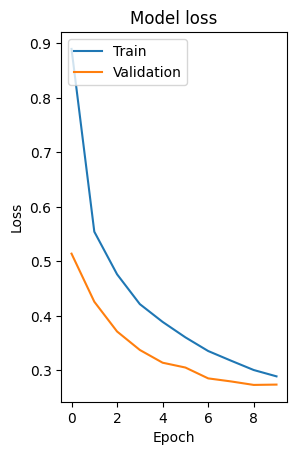

In [13]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [14]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.2641 - accuracy: 0.9023
Test accuracy: 0.9023000001907349


In [15]:
labels = ['t-shirt','trouser','pullover','dress','coat','sandal','sneakers','shirt','bag','ankle boots']

In [16]:
predictions = model.predict(test_images[:1])

1/1 [==============================] - 0s 191ms/step


t-shirt


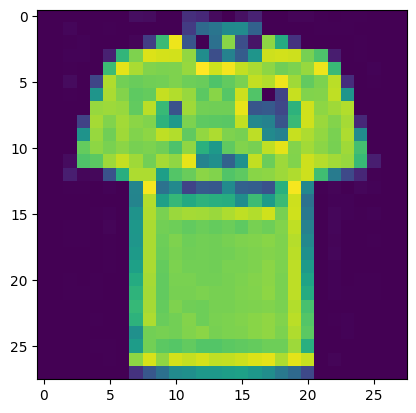

In [17]:
label = labels[np.argmax(predictions)]
print(label)
plt.imshow(test_images[:1][0])
plt.show()

No need of below figure

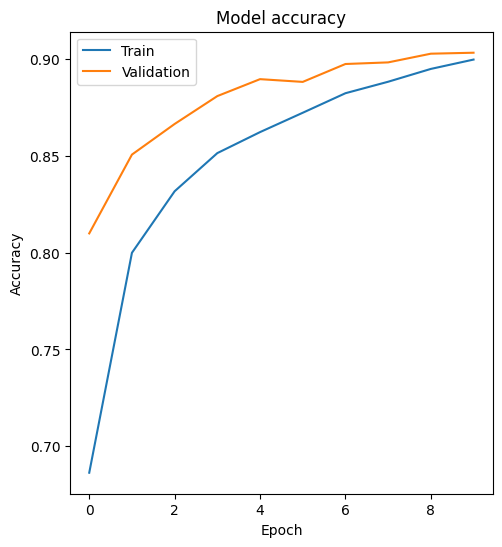

In [18]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')